In [1]:
import pandas as pd
import numpy as np

In [2]:
# creating a single df using the 4 csv files

df1 = pd.read_csv('C:\\Users\\nagpa\\Desktop\\research\\archive\\opel_corsa_01.csv', delimiter=';')
df2 = pd.read_csv('C:\\Users\\nagpa\\Desktop\\research\\archive\\opel_corsa_02.csv', delimiter=';')
df3 = pd.read_csv('C:\\Users\\nagpa\\Desktop\\research\\archive\\peugeot_207_01.csv', delimiter=';')
df4 = pd.read_csv('C:\\Users\\nagpa\\Desktop\\research\\archive\\peugeot_207_02.csv', delimiter=';')

frames = [df1,df2,df3,df4]

df = pd.concat(frames)

In [3]:
#dropping duplicates
df = df.drop_duplicates()

In [4]:
#dropping na values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [5]:
df['traffic'].value_counts()

LowCongestionCondition       17757
HighCongestionCondition       3015
NormalCongestionCondition     2990
Name: traffic, dtype: int64

In [6]:
# resetting index
df = df.reset_index(drop=True)

In [7]:
print(df.dtypes)

AltitudeVariation             object
VehicleSpeedInstantaneous     object
VehicleSpeedAverage           object
VehicleSpeedVariance          object
VehicleSpeedVariation         object
LongitudinalAcceleration      object
EngineLoad                    object
EngineCoolantTemperature     float64
ManifoldAbsolutePressure     float64
EngineRPM                     object
MassAirFlow                   object
IntakeAirTemperature         float64
VerticalAcceleration          object
FuelConsumptionAverage        object
roadSurface                   object
traffic                       object
drivingStyle                  object
dtype: object


In [8]:
# converting traffic data from string to int
category_mapping = {
    'LowCongestionCondition': 1,
    'NormalCongestionCondition': 2,
    'HighCongestionCondition': 3
}

df['traffic'] = df['traffic'].replace(category_mapping)

In [9]:
df.dtypes

AltitudeVariation             object
VehicleSpeedInstantaneous     object
VehicleSpeedAverage           object
VehicleSpeedVariance          object
VehicleSpeedVariation         object
LongitudinalAcceleration      object
EngineLoad                    object
EngineCoolantTemperature     float64
ManifoldAbsolutePressure     float64
EngineRPM                     object
MassAirFlow                   object
IntakeAirTemperature         float64
VerticalAcceleration          object
FuelConsumptionAverage        object
roadSurface                   object
traffic                        int64
drivingStyle                  object
dtype: object

In [10]:
# dropping target attributes other than traffic
df = df.drop(columns = ['drivingStyle','roadSurface'])

In [11]:
# converting attributes from object to float datatype
for col in df.columns:
    if df[col].dtype == 'object' :  # Check if the column type is object (string)
        df[col] = df[col].str.replace(',', '.').astype(float)

In [12]:
df.dtypes

AltitudeVariation            float64
VehicleSpeedInstantaneous    float64
VehicleSpeedAverage          float64
VehicleSpeedVariance         float64
VehicleSpeedVariation        float64
LongitudinalAcceleration     float64
EngineLoad                   float64
EngineCoolantTemperature     float64
ManifoldAbsolutePressure     float64
EngineRPM                    float64
MassAirFlow                  float64
IntakeAirTemperature         float64
VerticalAcceleration         float64
FuelConsumptionAverage       float64
traffic                        int64
dtype: object

In [13]:
# checking for nan values
np.any(np.isnan(df))

True

In [14]:
#dropping nan values
df = df.dropna()

In [15]:
df.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,traffic
count,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,-0.073686,38.324432,38.486315,152.004142,-0.006961,0.682914,43.223032,66.040769,111.844918,1386.259381,15.042012,29.232980,-0.473899,14.294776,1.585576
std,2.121466,32.972370,30.514422,171.253388,2.410998,0.970579,29.022111,18.107771,14.298477,573.308865,8.606840,11.725428,0.657983,3.943793,0.796114
min,-24.600006,0.000000,0.000000,0.000000,-18.000002,-3.065000,0.000000,12.000000,88.000000,0.000000,0.880000,8.000000,-2.763100,7.847495,1.000000
25%,-1.099998,12.599999,16.152954,43.322241,-0.900000,-0.058725,25.098040,51.000000,103.000000,792.500000,6.130000,19.000000,-0.917175,11.412642,1.000000
50%,0.000000,31.500000,30.389999,103.653911,0.000000,0.726850,38.039215,78.000000,105.000000,1355.000000,15.270000,29.000000,-0.430950,13.757747,1.000000
75%,0.900002,51.299999,46.638749,194.117638,0.900000,1.415000,72.549019,79.000000,114.000000,1722.500000,20.940001,38.000000,0.022200,16.511943,2.000000
max,11.400002,119.699997,114.884996,1418.370369,97.199997,3.979800,100.000000,86.000000,170.000000,2802.500000,38.549999,65.000000,1.501500,30.672386,3.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

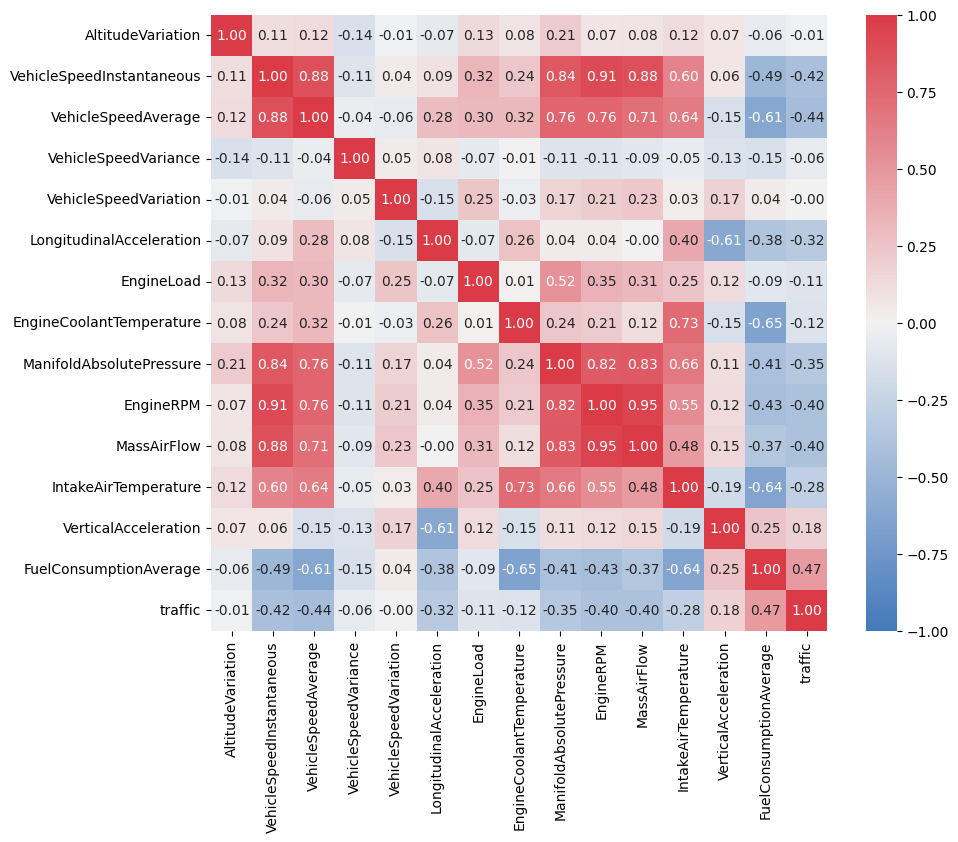

In [17]:
# creating correlation matrix for feature selection
correlation = df.corr()
plt.figure(figsize=(10, 8))
heatmap_df = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(250, 10, as_cmap=True),
square=True,annot=True,fmt=".2f"
)

In [18]:
# dropping attributes not required
df = df.drop(columns=['AltitudeVariation','VehicleSpeedVariation','VehicleSpeedInstantaneous'])

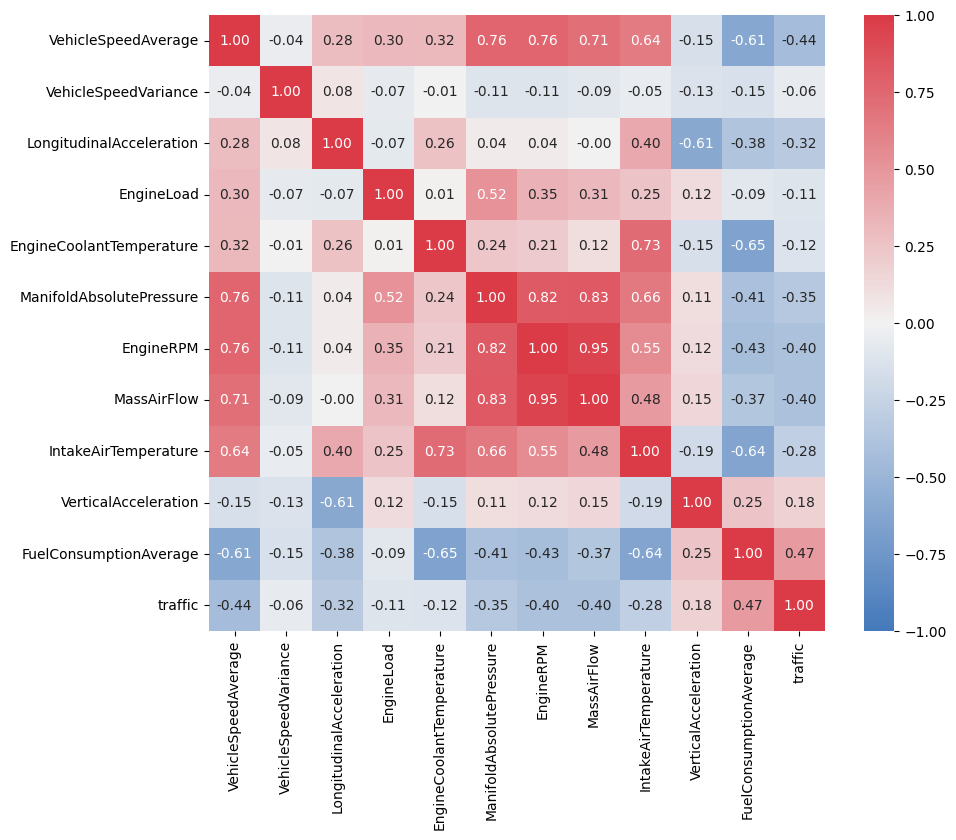

In [19]:
# correlation matrix of only required attributes
correlation = df.corr()
plt.figure(figsize=(10, 8))
heatmap_df = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(250, 10, as_cmap=True),
square=True,annot=True,fmt=".2f"
)

In [20]:
# pip install openpyxl

In [21]:
import openpyxl

In [22]:
# df.to_excel('trafficData2.xlsx', index=False)

In [23]:
# removing outliers

In [24]:
df.reset_index(drop=True,inplace=True)

In [25]:
from scipy import stats

In [27]:
import scipy.optimize
def mahalanobis(x=None,data=None, cov=None):
    x_minus_mu=x-np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term=np.dot(x_minus_mu, inv_covmat)
    mahal=np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

cols=['VehicleSpeedAverage','VehicleSpeedVariance',	'LongitudinalAcceleration',	'EngineLoad',	'EngineCoolantTemperature',	'ManifoldAbsolutePressure',	'EngineRPM',	'MassAirFlow',	'IntakeAirTemperature'	,'VerticalAcceleration', 'FuelConsumptionAverage']
final_df=df[cols]
final_df['mahala'] = mahalanobis(x=final_df,data=df[cols])
final_df.head()

,VehicleSpeedAverage,VehicleSpeedVariance,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,mahala
0,6.060,115.840061,1.0548,38.039215,31.0,101.0,798.0,6.22,15.0,-0.5982,27.919697,17.937478
1,6.345,117.200816,0.9012,38.039215,31.0,101.0,797.5,6.27,15.0,-0.5244,26.458355,13.499702
2,6.585,117.559595,0.9331,90.588234,32.0,101.0,797.5,6.27,15.0,-0.5068,26.458355,17.521610
3,6.825,117.801222,0.9878,90.588234,32.0,101.0,726.0,8.63,15.0,-0.4882,26.004126,18.987033
4,7.065,117.925697,1.1316,92.941177,32.0,101.0,784.0,8.88,15.0,-0.6712,25.295498,17.767989


<AxesSubplot:>

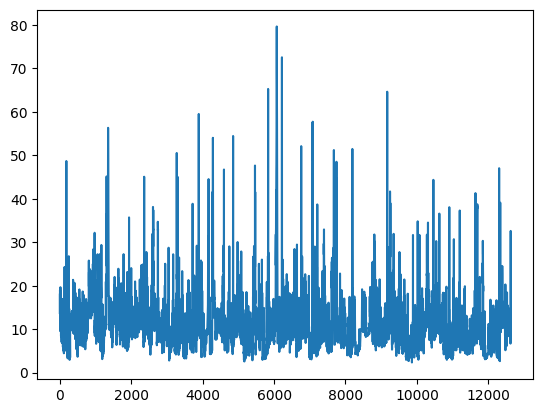

In [28]:
final_df['mahala'].plot()

In [34]:
filtered_final_df = final_df[final_df['mahala']<30]
outliers = final_df[final_df['mahala']>30]

In [30]:
# we have 223 outliers

In [32]:
filtered_final_df = filtered_final_df.merge(df[['traffic']], left_index=True, right_index=True)

In [33]:
filtered_final_df['traffic'].value_counts()

1    7548
3    2447
2    2414
Name: traffic, dtype: int64

In [38]:
outliers

,VehicleSpeedAverage,VehicleSpeedVariance,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,mahala
181,39.059999,92.510229,0.8340,0.000000,51.0,111.0,1062.0,25.99,35.0,-0.4899,14.668366,48.696937
969,9.210000,80.653114,1.5309,0.000000,79.0,111.0,252.0,4.33,41.0,-0.7095,21.967314,30.072342
971,8.355000,73.561496,1.6060,0.000000,79.0,102.0,0.0,0.88,41.0,-0.7577,21.967314,32.185799
972,7.965000,70.753496,1.5976,0.000000,79.0,102.0,0.0,0.88,41.0,-0.7314,21.967314,32.164315
973,7.620000,68.958911,1.5900,0.000000,79.0,102.0,0.0,0.88,41.0,-0.7465,21.967314,32.049077
...,...,...,...,...,...,...,...,...,...,...,...,...
11695,18.060000,121.194298,-1.0050,100.000000,79.0,103.0,0.0,0.88,30.0,0.3022,11.702127,38.303484
11847,11.007195,35.916580,-1.3380,98.823532,16.0,101.0,914.0,12.19,11.0,-0.1815,28.395073,30.323031
12304,29.873305,117.943430,-0.2862,1.568627,62.0,107.0,784.0,22.52,21.0,0.1075,16.893169,47.039487
12335,32.909999,123.294808,0.1232,0.000000,82.0,110.0,887.0,21.66,24.0,-0.1203,11.260183,39.112628
